## Módulo 01 - Introdução

In [192]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
FILE = '../data/BancoDeDados.csv'

In [4]:
df = pd.read_csv(FILE)

In [5]:
df.head(2)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [6]:
df.shape

(116581, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [8]:
def plot_perc(col, df, title):
    g = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    g.set_title(title, fontsize=15)
    g.set_xlabel(col, fontsize=10)
    g.set_ylabel('Quantidade', fontsize=10)
    # g.set_xticks(ticks=g.get_xticklabels())
    # g.get_yticklabels()
    g.set_xticklabels(labels=g.get_xticklabels(), rotation=45)

    sizes = list()
    for p in g.patches:
    #     print(p)
        height = p.get_height()
        sizes.append(height)
    #     print(p.get_x()), print(p.get_width())
        g.text(x=p.get_x()+p.get_width()/2, y=height+200, s='{:.0f}%'.format(height/len(df)*100), ha='center', va='bottom', fontsize=10)

    g.set_ylim(0, max(sizes) * 1.1); # Definindo o intervalo de y => mínimo=0, máximo = 10% a mais do valor máximo de y

    # g.text
    #     x => posição x onde o texto será colocado. No caso acima, foi utilizada a posição inicial do x (p.get_x()) + metade da largura da barra,
    #     para que o texto ficasse bem no meio da barrinha
    #     y => posição y onde o texto será colocado. No caso acima, foi utilizada a própria altura da barra, acrescido de 200 para que o texto não
    #     ficasse muito junto
    #     s => é o próprio conteúdo do texto, onde calculamos a representatividade de cada estado

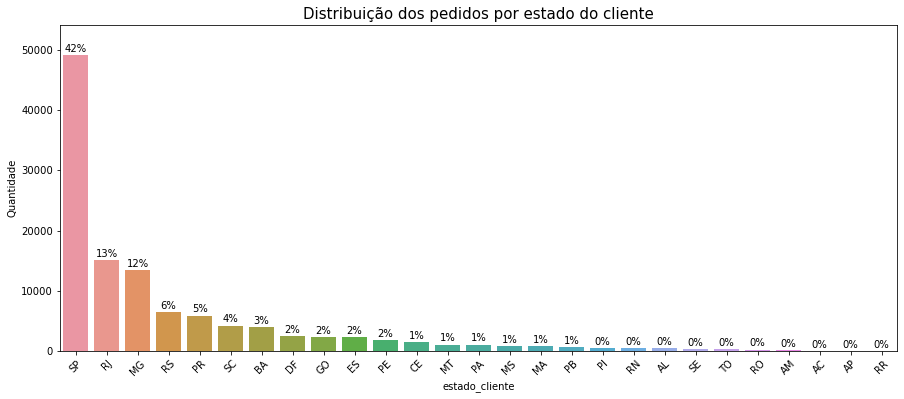

In [9]:
plot_perc(col='estado_cliente', df=df, title='Distribuição dos pedidos por estado do cliente')

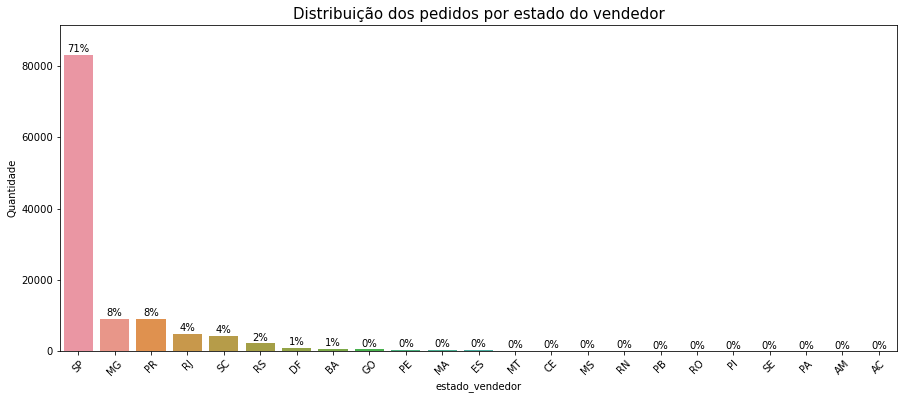

In [10]:
plot_perc(col='estado_vendedor', df=df, title='Distribuição dos pedidos por estado do vendedor')

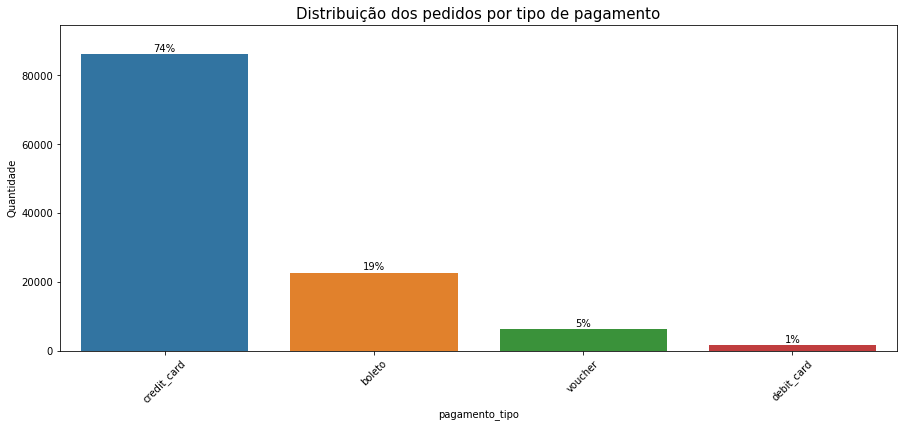

In [11]:
plot_perc(col='pagamento_tipo', df=df, title='Distribuição dos pedidos por tipo de pagamento')

Vimos que grande parte dos pedidos são de clientes do Sudeste, com uma concentração em SP. Também percebemos que +70% dos pedidos são de vendedores de SP. 74% dos pedidos são pagos com Cartão de Crédito e 19% com boleto.

Nesta aula, aprendemos:

- Quais as principais etapas em um problema de segmentação;
- Que tipo de dados vamos precisar obter;
- Como a análise exploratória pode ajudar a identificar insights;
- Como adicionar textos informativos em gráficos.

## Módulo 02 - Modelos RFM

- ### Recência (R)
     Há quantos dias foi a última compra desse cliente?

- ### Frequência (F)
    Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

- ### Monetaridade (M)
    Quanto esse cliente já gastou em dinheiro na sua empresa?

#### Analisando as duplicidades

In [12]:
df['id_pedido'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
68986e4324f6a21481df4e6e89abcf01    24
                                    ..
f11877a328215697cb35c93e04e7780a     1
dad7ec529acfeae5322bdcb8f933e5c1     1
9c6091fbefbb76532f8a51939765c532     1
9bf1ceb820bc945c03785708af99d14a     1
738129d32fe1f1ed56c7078789ebe85a     1
Name: id_pedido, Length: 97255, dtype: int64

In [13]:
df[df['id_pedido'] == '895ab968e7bb0d5659d16cd74cd1650c'].sort_values('pagamento_sequencial')

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
21348,21348,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,1,voucher,1,2.61,5,utilidades_domesticas,housewares,89217,joinville,SC
19544,19544,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,2,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,1,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19523,19523,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,1,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19529,19529,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,2,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
21354,21354,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,2,voucher,1,2.61,5,utilidades_domesticas,housewares,89217,joinville,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,19539,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,20,voucher,1,4.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
21364,21364,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,20,voucher,1,4.61,5,utilidades_domesticas,housewares,89217,joinville,SC
19528,19528,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,21,voucher,1,0.28,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19549,19549,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,2,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,21,voucher,1,0.28,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ


In [14]:
df[df.duplicated(subset=['id_pedido', 'item_id', 'pagamento_sequencial'], keep=False)].head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
546,546,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
547,547,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
705,705,f5c36ac199073a62861ebda86e8cc725,ca994abc57b0bd7981d91d0061b3d8d6,1,90430,porto alegre,RS,70c77e51e0f179d75a64a614135afb6a,delivered,2017-07-13 21:03:44,2017-07-15 03:34:37,2017-07-25 19:35:45,2017-08-25 19:41:53,2017-08-14 00:00:00,7c67e1448b00f6e969d365cea6b010ab,209.99,53.48,1,boleto,1,263.47,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
706,706,f5c36ac199073a62861ebda86e8cc725,ca994abc57b0bd7981d91d0061b3d8d6,1,90430,porto alegre,RS,70c77e51e0f179d75a64a614135afb6a,delivered,2017-07-13 21:03:44,2017-07-15 03:34:37,2017-07-25 19:35:45,2017-08-25 19:41:53,2017-08-14 00:00:00,7c67e1448b00f6e969d365cea6b010ab,209.99,53.48,1,boleto,1,263.47,2,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
754,754,7e2d8e10c5c9339ad1492ad76452465f,a982bd0fec12d781fecd9f1e17cb81bf,1,48967,nucleo residencial pilar,BA,cb5b7fb63c0add7098c025cb737df02e,delivered,2018-02-25 17:37:04,2018-02-27 04:31:06,2018-03-01 21:36:54,2018-03-19 16:46:35,2018-04-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,116.99,17.26,1,boleto,1,134.25,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [15]:
df[df['id_pedido'] == '5040757d4e06a4be96d3827b860b4e7c']

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
546,546,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
547,547,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


Conclusão: Pela análise, aparemente não existe uma coluna que nos permita concluir se há duplicidades equivocadas ou se as duplicidades referem-se à quantidade comprada de um mesmo item. Sendo assim, vamos assumir que as duplicidades são válidas e representam a quantidade comprada.

In [295]:
# Vamos criar uma base apenas com as variáveis que desejamos para criar o modelo RFM
df_rfm = df[df['status_pedido'] == 'delivered'][['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco',]].copy()

In [296]:
df_rfm.head(2)

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99


In [297]:
# Agrupando os clientes pela última data que compraram
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'data_max_compra']
df_compra['data_max_compra'] = pd.to_datetime(df_compra['data_max_compra'])

In [298]:
df_compra.head()

,id_unico_cliente,data_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [299]:
# Calculando a Recência
df_compra['recencia'] = (df_compra['data_max_compra'].max() - df_compra['data_max_compra']).dt.days
# Considerando como data referência a data máxima da coluna 'data_max_compra'

In [300]:
df_compra.head()

,id_unico_cliente,data_max_compra,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [310]:
df_compra['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
1ffa1c8081e0965ad547cec0656e6883    1
b8cb40ec83dd073753f79b286ad8d941    1
ced05597ec7e942e23b8f474802c218d    1
15dd90517e41922bca9403ce5012b3f0    1
Name: id_unico_cliente, dtype: int64

In [301]:
df_rfm.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [302]:
# Vamos criar um terceiro dataframe juntando os outros dois
df_rfm_2 = pd.merge(df_rfm, df_compra[['id_unico_cliente', 'recencia']])

In [311]:
df_rfm_2.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


Vamos agora determinar a quantidade ideal de clusters.

In [312]:
def calcula_wcss(data):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
#         data['cluster'] = kmeans.labels_ => Não faz sentido atribuir aqui, pois sempre será o label de k=10
        wcss.append(kmeans.inertia_)
    return wcss

WCSS is the sum of squared distance between each point and the centroid in a cluster.

In [313]:
# A princípio, vamos clusterizar apenas a coluna 'recencia'. Para isso, criamos um df com apenas essa coluna.
df_recencia = df_rfm_2[['id_unico_cliente', 'recencia']]

In [314]:
df_recencia.head(2)

,id_unico_cliente,recencia
0,861eff4711a542e4b93843c6dd7febb0,474
1,9eae34bbd3a474ec5d07949ca7de67c0,298


In [315]:
df_recencia['id_unico_cliente'].value_counts().head()

9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
569aa12b73b5f7edeaa6f2a01603e381    26
db1af3fd6b23ac3873ef02619d548f9c    24
Name: id_unico_cliente, dtype: int64

In [316]:
df_recencia.drop_duplicates()['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
e8b5ab551715d3927b6a2a55f65f84e3    1
cad8fdfc1352a1878f05378baeb8b43f    1
127ea7932a3ebe9ee2ca5922f66875ab    1
c377e85b89c482c0ec28287501bdf580    1
Name: id_unico_cliente, dtype: int64

In [317]:
df_recencia.drop_duplicates(inplace=True)

In [318]:
inertia = calcula_wcss(df_recencia[['recencia']])

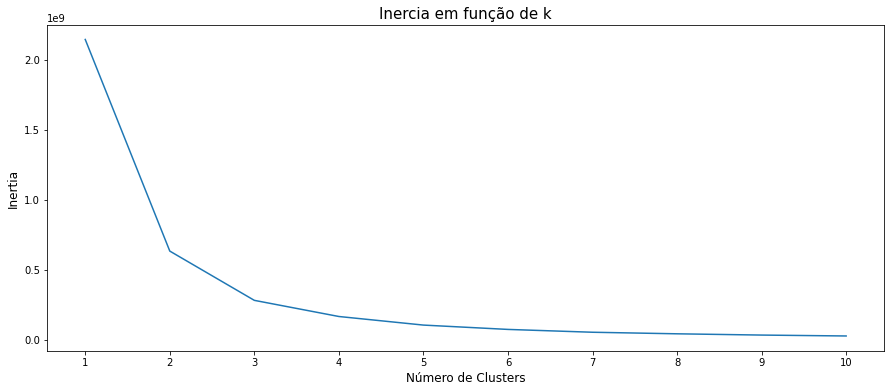

In [319]:
# Vamos plotar o gráfico da inércia para definir o k a partir do Elbow (Cotovelo)
plt.figure()
plt.plot(range(1,len(inertia)+1), inertia)
plt.xlabel('Número de Clusters', fontsize=12) # O plt por padrão utiliza para o eixo x o próprio index
plt.xticks(range(1,len(inertia)+1))
plt.ylabel('Inertia', fontsize=12)
plt.title('Inercia em função de k', fontsize=15)
plt.show()

Para saber onde de fato está o tal do cotovelo, podemos utilizar a função abaixo. A ideia é traçar uma reta do primeiro ponto do gráfico até o último e calcular a distância de cada ponto até a reta. O ponto que tiver a maior distância será o número ideal de clusters. A fórmula para calcular essas distâncias é dada por:

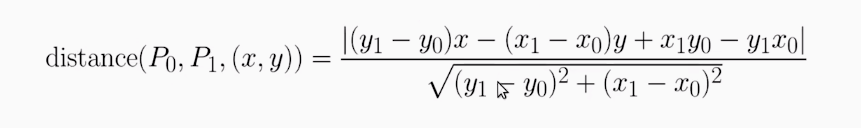

Onde:
   - P0 é o primeiro ponto
   - P1 é o último ponto
   - (x, y) são as coordenadas dos ponto para os quais queremos calcular a distância até a reta

### Sobre a Inércia (Erro Quadrático Médio Intra-Cluster)

- Funciona melhor para clusters globulares, mas é uma métrica ruim quando os clusters possuem formato irregular
- Não é uma métrica normalizada, ou seja, quanto mais dimensões você tiver, maior será o resultado
- Não leva em consideração a componente inter-cluster, ou seja, mede apenas o quão compacto estão os clusters, mas não o quanto esses clusters estão separados
- Dependendo da distribuição dos clusters, fica inviável identificar um cotovelo ("caimento" do gráfico sempre suave)

### Codificando a Regra Matemática

In [320]:
import math

In [321]:
def num_otimo_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [322]:
n = num_otimo_clusters(inertia)

In [323]:
print(n)

4


> ⚠ Na aula a quantidade ótima de cluster foi calculada para recência, mas aplicada para as outras features clusterizadas. Essa não é a abordagem ideal, visto que a quantidade ótima de cluster para uma variável pode não ser a mesma para outra variável.

### Exercício

Seu gestor pediu para que você identificasse de quais estados vem as compras de maior valor e também quais estados tem mais valor de frete. Para fazer isso, é preciso que você faça dois gráficos de barras novo. Como você faria essa análise?

Como o enunciado diz "as compras de maior valor", precisamos primeiro agrupar as compras por id do pedido

In [324]:
df[['id_pedido', 'preco', 'frete', 'estado_cliente']].head(2)

,id_pedido,preco,frete,estado_cliente
0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88,SP
1,c1d2b34febe9cd269e378117d6681172,112.99,24.90,PA


In [325]:
df_preco_frete = df[['id_pedido', 'preco', 'frete', 'estado_cliente']].groupby(['id_pedido', 'estado_cliente']).sum()
df_preco_frete = df_preco_frete.reset_index()

In [326]:
df_preco_frete.head()

,id_pedido,estado_cliente,preco,frete
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,SP,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,MG,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,SP,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,199.90,18.14


In [327]:
df_preco_frete['id_pedido'].value_counts().head(2)

aeb970f75d1a1aa41b4fd895c60fcdeb    1
e37cb83a77f2c53e5710ace789c66a97    1
Name: id_pedido, dtype: int64

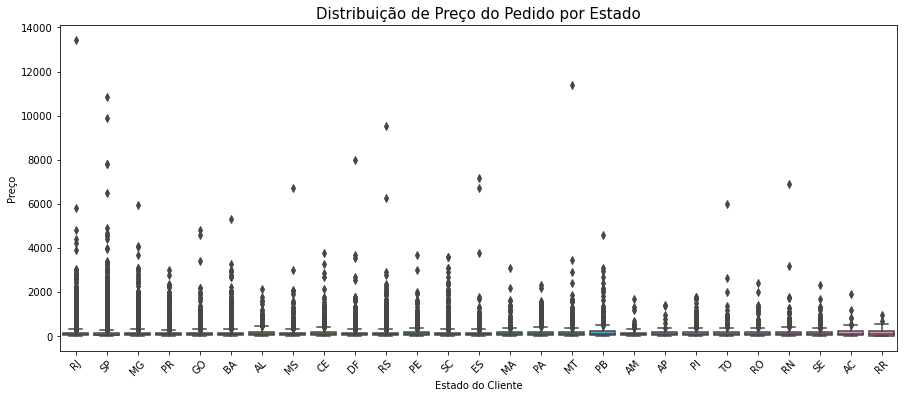

In [328]:
plt.figure()
g2 = sns.boxplot(x='estado_cliente', y='preco', data=df_preco_frete)
g2.set_title('Distribuição de Preço do Pedido por Estado', fontsize=15)
g2.set_xlabel('Estado do Cliente', fontsize=10)
g2.set_ylabel('Preço', fontsize=10)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);

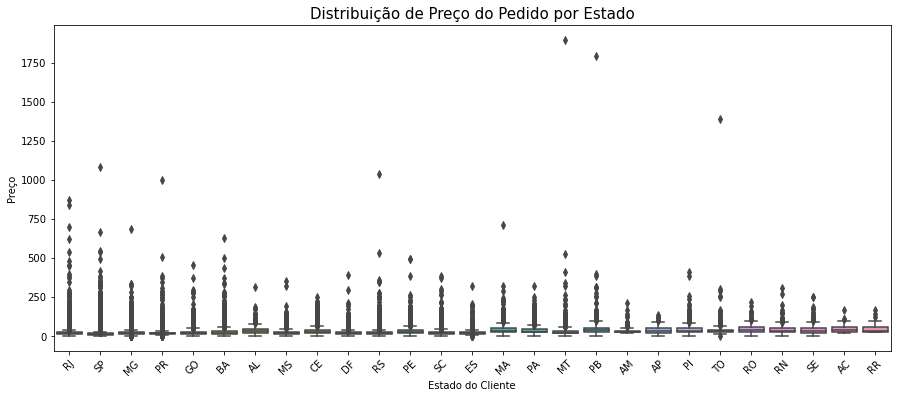

In [329]:
plt.figure()
g2 = sns.boxplot(x='estado_cliente', y='frete', data=df_preco_frete)
g2.set_title('Distribuição de Preço do Pedido por Estado', fontsize=15)
g2.set_xlabel('Estado do Cliente', fontsize=10)
g2.set_ylabel('Preço', fontsize=10)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);

Nesta aula, aprendemos:

- Modelos RFM (recência, frequência e monetaridade);
- Como funciona o método k-means;
- Como usar a regra do cotovelo para definir o número de clusters;
- Como usar uma regra matemática para confirmar o número de clusters;

## Módulo 03 - Clusterizando o modelo RFM

### Clusterizando a Recência

In [330]:
kmeans = KMeans(n_clusters=4)

In [331]:
df_recencia['recencia_cluster'] = kmeans.fit_predict(df_recencia[['recencia']])

In [332]:
df_recencia.head()

,id_unico_cliente,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,298,2
3,3c799d181c34d51f6d44bbbc563024db,483,1
4,23397e992b09769faf5e66f9e171a241,211,0
5,567ab47ca4deb92d46dbf54dce07d0a7,528,1


In [333]:
df_recencia['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
e8b5ab551715d3927b6a2a55f65f84e3    1
cad8fdfc1352a1878f05378baeb8b43f    1
127ea7932a3ebe9ee2ca5922f66875ab    1
c377e85b89c482c0ec28287501bdf580    1
Name: id_unico_cliente, dtype: int64

In [337]:
df_recencia.shape

(92078, 3)

As duplicidades também impactam no cálculo da média que define a ordenação dos clusters. Por isso, é necessário removê-las nesta etapa também. Ou então, podemos usar o df que já está sem duplicidades. Neste caso, o 'df_recencia'.

In [338]:
agrupado_por_cluster = df_recencia.groupby('recencia_cluster')['recencia'].mean().reset_index()
agrupado_por_cluster

,recencia_cluster,recencia
0,0,187.267738
1,1,487.207487
2,2,317.916085
3,3,66.002770


In [339]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado

,recencia_cluster,recencia
0,1,487.207487
1,2,317.916085
2,0,187.267738
3,3,66.002770


In [340]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,recencia_cluster,recencia,index
0,1,487.207487,0
1,2,317.916085,1
2,0,187.267738,2
3,3,66.002770,3


In [341]:
juntando_cluster = pd.merge(df_rfm_2, agrupado_por_cluster_ordenado[['recencia_cluster', 'index']], on='recencia_cluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [342]:
# Verificando se foi feito corretamente
juntando_cluster[juntando_cluster['recencia_cluster'] == 0]['index'].unique()

array([2], dtype=int64)

In [343]:
removendo_dados = juntando_cluster.drop('recencia_cluster', axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [344]:
df_final = removendo_dados.rename(columns={'index': 'recencia_cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [345]:
def fit_order_cluster(df, model, column_cluster, sort_ascending=True):
    """
    Returns DataFrame with cluster's column
    
    :df: DataFrame containing columns that you want to fit.
    :model: Object containing model instanced.
    :column_cluster: Column that model will fit.
    :sort_ascending: "True" if less mean is worse. "False" if less mean is better.
    
    :return: DataFrame with cluster's column.
    """
    column_name = '{}_cluster'.format(column_cluster) # define o nome da coluna onde será armazenado o cluster
    df[column_name] = model.fit_predict(df[[column_cluster]]) # ajusta o modelo
    agrupado_por_cluster = df.groupby(column_name)[column_cluster].mean().reset_index() # calcula a média da coluna por cluster
    # ordena pela média calculada acima
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=column_cluster, ascending=sort_ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index # cria uma coluna com o índice
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[column_name, 'index']], on=column_name) # junta os dataframes
    removendo_dados = juntando_cluster.drop(column_name, axis=1) # remove o cluster antigo
    df_final = removendo_dados.rename(columns={'index': column_name}) # renomeia o novo cluster
    return df_final

In [346]:
cluster_recencia = fit_order_cluster(df=df_recencia, model=kmeans, column_cluster='recencia', sort_ascending=False)

In [347]:
cluster_recencia.head()

,id_unico_cliente,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,0
1,3c799d181c34d51f6d44bbbc563024db,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0
3,f40ab89b622248b7ca125af4b486b887,474,0
4,749943913a9851a39c9baf51877fbab6,533,0


In [348]:
cluster_recencia.groupby('recencia_cluster')['recencia'].mean()

recencia_cluster
0    487.207487
1    317.916085
2    187.267738
3     66.002770
Name: recencia, dtype: float64

In [349]:
cluster_recencia.groupby('recencia_cluster')['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
0,16242.0,487.207487,58.878548,403.0,440.0,479.0,530.0,699.0
1,23941.0,317.916085,43.224749,253.0,280.0,311.0,355.0,402.0
2,26623.0,187.267738,35.157045,127.0,157.0,187.0,218.0,252.0
3,25272.0,66.002770,35.877599,4.0,33.0,66.0,99.0,126.0


### Clusterizando a Frequência

In [351]:
df_frequencia = df[df['status_pedido'] == 'delivered'].groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'frequencia']
df_frequencia.head()

,id_unico_cliente,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [352]:
df_frequencia['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
1ffa1c8081e0965ad547cec0656e6883    1
51fd7ac69a283bb9633a40fd7fbb86ba    1
38dfe4655fc8785c5bf00923d9fca1ef    1
ff994a455350d9f24c79a7482b89dfe6    1
Name: id_unico_cliente, dtype: int64

In [353]:
cluster_frequencia = fit_order_cluster(df=df_frequencia, model=kmeans, column_cluster='frequencia', sort_ascending=True)

In [354]:
cluster_frequencia.head()

,id_unico_cliente,frequencia,frequencia_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,0
2,0000f46a3911fa3c0805444483337064,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,0
4,0004aac84e0df4da2b147fca70cf8255,1,0


In [355]:
cluster_frequencia['frequencia'].unique()

array([ 1,  0,  2,  3,  4,  7,  5,  6,  8,  9, 12, 15, 10, 18, 11, 14, 24,
       19, 22, 20, 21, 26, 16, 38, 13, 75, 35], dtype=int64)

In [356]:
cluster_frequencia.groupby('frequencia_cluster')['frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencia_cluster,,,,,,,,
0,78206.0,0.999847,0.012386,0.0,1.0,1.0,1.0,1.0
1,12072.0,2.163022,0.369401,2.0,2.0,2.0,2.0,3.0
2,1692.0,4.835106,1.153760,4.0,4.0,4.0,6.0,9.0
3,108.0,14.500000,7.860346,10.0,11.0,12.0,15.0,75.0


Por isso que tinha apenas um indivíduo com frequência 75, mas o count marcava 75. O cluster ficou com 75 indivíduos, porém iguais. Na prática, criamos um cluster com apenas um cliente, o que não faz sentido algum.

In [357]:
# Sem duplicidades
cluster_frequencia.groupby('frequencia_cluster')['frequencia'].mean()

frequencia_cluster
0     0.999847
1     2.163022
2     4.835106
3    14.500000
Name: frequencia, dtype: float64

### Clusterizando a Receita

In [358]:
df_receita = df[df['status_pedido'] == 'delivered'].groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'receita']
df_receita.head()

,id_unico_cliente,receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [359]:
df_receita['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
1ffa1c8081e0965ad547cec0656e6883    1
51fd7ac69a283bb9633a40fd7fbb86ba    1
38dfe4655fc8785c5bf00923d9fca1ef    1
ff994a455350d9f24c79a7482b89dfe6    1
Name: id_unico_cliente, dtype: int64

In [360]:
cluster_receita = fit_order_cluster(df=df_receita, model=kmeans, column_cluster='receita', sort_ascending=True)

In [361]:
cluster_receita.head()

,id_unico_cliente,receita,receita_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0
2,0000f46a3911fa3c0805444483337064,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,0


In [362]:
cluster_receita.groupby('receita_cluster')['receita'].describe()

,count,mean,std,min,25%,50%,75%,max
receita_cluster,,,,,,,,
0,90795.0,173.184928,191.224386,9.59,63.2700,111.33,196.665,1406.20
1,1262.0,2644.315824,1665.884899,1408.05,1645.9525,2032.76,2915.985,12490.88
2,20.0,23226.669000,9500.123792,14196.28,16880.7200,19258.32,28226.475,45256.00
3,1.0,109312.640000,NaN,109312.64,109312.6400,109312.64,109312.640,109312.64


### Exercício

In [363]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [364]:
df.loc[df['estado_cliente'].isin(sudeste), 'regiao_cliente'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'regiao_cliente'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'regiao_cliente'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'regiao_cliente'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'regiao_cliente'] = 'South'

In [365]:
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette('green', as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap=cm)

In [366]:
df[['id_unico_cliente', 'estado_vendedor', 'regiao_cliente']].head()

,id_unico_cliente,estado_vendedor,regiao_cliente
0,861eff4711a542e4b93843c6dd7febb0,SP,Southeast
1,9eae34bbd3a474ec5d07949ca7de67c0,SP,North
2,9eae34bbd3a474ec5d07949ca7de67c0,SP,North
3,3c799d181c34d51f6d44bbbc563024db,SP,South
4,23397e992b09769faf5e66f9e171a241,SP,Southeast


In [367]:
# Mapa de calor onde podemos analisar a média de frete do estado do vendedor por região do cliente 
cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'regiao_cliente'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='median')

regiao_cliente,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,24.895000,44.460000,18.300000,30.440000,27.235000
CE,48.425000,38.810000,21.140000,38.010000,32.840000
DF,11.720000,35.410000,23.180000,25.630000,17.310000
ES,30.105000,71.900000,37.990000,39.790000,31.690000
GO,14.240000,24.060000,25.380000,34.150000,20.470000
MA,24.775000,20.590000,19.140000,31.715000,27.750000
MG,18.935000,35.645000,23.725000,22.240000,16.460000


Nesta aula, aprendemos:

- Como clusterizar os dados usando kmeans;
- Como ordenar os dados de forma que o número de cluster sirva como pontuação;
- Criar funções de forma simplificada ao segmentar as operações;

In [368]:
df_cluster = pd.merge(pd.merge(df_recencia, df_frequencia, on='id_unico_cliente', how='outer'), df_receita, on='id_unico_cliente', how='outer')

In [369]:
df_cluster.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,2,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,2,551.58,0
2,3c799d181c34d51f6d44bbbc563024db,483,2,1,0,140.61,0
3,23397e992b09769faf5e66f9e171a241,211,0,1,0,137.58,0
4,567ab47ca4deb92d46dbf54dce07d0a7,528,2,1,0,142.05,0


In [370]:
# Sem considerar o mesmo critério para recência
# df_cluster.shape, df_recencia.shape, df_frequencia.shape, df_receita.shape
# ((116581, 28), (94087, 7), (94087, 3), (92078, 3), (92078, 3))

# Considerando o mesmo critério para recência
df_cluster.shape, df_recencia.shape, df_frequencia.shape, df_receita.shape

((92078, 7), (92078, 3), (92078, 3), (92078, 3))

Os nulos existem por conta do cálculo de receita e frequência, onde filtramos apenas as compras já entregues, o que não foi feito com a recência. Precisamos então utilizar o mesmo critério com a recência.

In [371]:
# Sem considerar o mesmo critério para recência
# id_unico_cliente         0
# recencia                 0
# recencia_cluster         0
# frequencia            2009
# frequencia_cluster    2009
# receita               2009
# receita_cluster       2009
# dtype: int64

# Considerando o mesmo critério para recência
df_cluster.isna().sum()

id_unico_cliente      0
recencia              0
recencia_cluster      0
frequencia            0
frequencia_cluster    0
receita               0
receita_cluster       0
dtype: int64

In [372]:
df_cluster.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,2,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,2,551.58,0
2,3c799d181c34d51f6d44bbbc563024db,483,2,1,0,140.61,0
3,23397e992b09769faf5e66f9e171a241,211,0,1,0,137.58,0
4,567ab47ca4deb92d46dbf54dce07d0a7,528,2,1,0,142.05,0


## Módulo 04 - Criando uma pontuação para os clientes

### Criando uma pontuação

Na aula, não foram removidas as duplicidades de clientes. Isso atrapalha a clusterização do kmeans, pois influencia principalmente o cálculo dos centróides. Por isso, fiz algumas alterações no código acima para corrigir isso e agrupei novamente os clientes.

In [374]:
df_cluster['id_unico_cliente'].value_counts().head()

14a18adda9a743a4c0fe6b9f7770c413    1
e8b5ab551715d3927b6a2a55f65f84e3    1
cad8fdfc1352a1878f05378baeb8b43f    1
127ea7932a3ebe9ee2ca5922f66875ab    1
c377e85b89c482c0ec28287501bdf580    1
Name: id_unico_cliente, dtype: int64

In [375]:
df_cluster.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,2,1,0,146.87,0
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,2,551.58,0
2,3c799d181c34d51f6d44bbbc563024db,483,2,1,0,140.61,0
3,23397e992b09769faf5e66f9e171a241,211,0,1,0,137.58,0
4,567ab47ca4deb92d46dbf54dce07d0a7,528,2,1,0,142.05,0


In [376]:
df_cluster['pontuacao'] = df_cluster['recencia_cluster'] + df_cluster['frequencia_cluster'] + df_cluster['receita_cluster']

In [377]:
df_cluster.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster,pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,2,1,0,146.87,0,2
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,2,551.58,0,3
2,3c799d181c34d51f6d44bbbc563024db,483,2,1,0,140.61,0,2
3,23397e992b09769faf5e66f9e171a241,211,0,1,0,137.58,0,0
4,567ab47ca4deb92d46dbf54dce07d0a7,528,2,1,0,142.05,0,2


In [378]:
df_cluster['pontuacao'].value_counts()

3    24981
0    22523
1    20486
2    17590
5     3524
4     2633
6      212
7      117
8       12
Name: pontuacao, dtype: int64

In [380]:
df_cluster['segmento'] = 'inativo'
df_cluster.loc[df_cluster['pontuacao'] >= 1, 'segmento'] = 'business'
df_cluster.loc[df_cluster['pontuacao'] >= 3, 'segmento'] = 'master'
df_cluster.loc[df_cluster['pontuacao'] >= 5, 'segmento'] = 'premium'

In [381]:
df_cluster.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster,pontuacao,segmento
0,861eff4711a542e4b93843c6dd7febb0,474,2,1,0,146.87,0,2,business
1,9eae34bbd3a474ec5d07949ca7de67c0,298,1,2,2,551.58,0,3,master
2,3c799d181c34d51f6d44bbbc563024db,483,2,1,0,140.61,0,2,business
3,23397e992b09769faf5e66f9e171a241,211,0,1,0,137.58,0,0,inativo
4,567ab47ca4deb92d46dbf54dce07d0a7,528,2,1,0,142.05,0,2,business


In [382]:
df_cluster['segmento'].value_counts()

business    38076
master      27614
inativo     22523
premium      3865
Name: segmento, dtype: int64

In [383]:
df_cluster.to_csv('../data/rfm.csv')

Nesta aula, aprendemos:

- Criar um modelo de pontuação com base nos clusters;
- Fazer visualizações com scatterplot;
- Identificar o comportamento dos clientes;